# Problem Set #3

**Computational Mathematics (ΥΦΥ101)**

Implemented by: **Anastasios-Faidon Retselis (AEM: 4394)**

# Exercise 1

## Problem Statement:

Use the simple Simpson's h/3 rule and the same rule with $n=8$ to calculate the integral:

$$
\int_{0}^{3}xe^{2x}dx
$$

## Solution

In [1]:
import math

def f(x):
    # Function to be integrated
    # Input is x
    # Returns value f(x)
    return x*math.exp(2*x)

def simpson_simple_form(x_min,x_max):
    # Integrates using the simple form of simpson's h/3 rule
    # Input is the lower and upper limits of the integral
    # Function to be integrated is defined as a separate function f(x) in this file
    # Returns the value of the integral
    h = (x_max-x_min)/2
    middle = x_min + (x_max-x_min)/2
    integral = (h/3)*(f(x_min)+4*f(middle)+f(x_max))
    return integral

def simpson_multiple_form(x_min,x_max,n_segments):
    # Integrates using the multiple application form of simpson's h/3 rule
    # Input is the lower and upper values of the integral and the number of segments (must be even)
    # Function to be integrated is defined as a separate function f(x) in this file
    # Returns the value of the integral
    if(n_segments%2 != 0):
        raise ValueError('Simpson\'s h/3 rule only works for an even number of segments!')
    h = (x_max-x_min)/n_segments
    odd_sum = 0.0
    even_sum = 0.0
    for i in range(1,n_segments):
        if(i%2==0 and i<=n_segments-2):
            even_sum += f(x_min+i*h)
        else:
            odd_sum += f(x_min+i*h)
    integral = (x_max-x_min)*(f(x_min)+4*odd_sum+2*even_sum+f(x_max))/(3*n_segments)
    return integral
    
    
a = 0
b = 3
n = 8000
simple_result = simpson_simple_form(a,b)
print('Using the simple form of Simpson\'s rule, I = %.4lf\n' % simple_result)
multiple_result = simpson_multiple_form(a,b,n)
print('Using the multiple form of Simpson\'s rule with n = %d segments, I = %.4lf\n' % (n, multiple_result))

Using the simple form of Simpson's rule, I = 665.3998

Using the multiple form of Simpson's rule with n = 8000 segments, I = 504.5360



## Error comparison and conclusion

Let us determine the trunctuation error $E_{t}$ and the relative error $\epsilon_{t}$ for each case to determine how accurate each method is. For the simple form, the trunctuation error is given by the formula:

$$
E_{t}=-\frac{(b-a)^{5}}{2880}f^{(4)}(\xi)
$$

where $\xi$ is somewhere between $a$ and $b$. For this example, we have $a=0$ and $b=3$ and we can pick $\xi=a+\frac{b-a}{2}=1.5$. Computing the fourth derivative, we end up with:

$$
E_{t}=-\frac{(3-0)^{5}}{2880}(1124.79)=-94.90
$$

and a relative error of $\epsilon_{t}=16.64\%$.

Let us now calculate the errors for the $n=8$ segments case. The approximation error is computed via the formula:

$$
E_{a}=-\frac{(b-a)^{5}}{180 n^{4}} \bar{f}^{(4)}
$$

where $\bar{f}^{(4)}$ is the average value for the interval's 4th derivative. Computing over the interval, we get:

$$
E_{a}=-\frac{(3-0)^{5}}{180\cdot8^{4}}(4837)=1.59
$$

or a relative error of $\epsilon_{t}=0.29\%$, highlighting the advantage of choosing multiple segments when applying the Simpson's rule, since with just eight segments we managed to drop the error below $0.5\%$.


# Exercise 2

## Problem Statement:

Solve the following differential equation from $t=0$ until $t=2$ with $y(0)=1$

$$
\frac{dy}{dt}=yt^{2}-1.1y
$$

using 

1. Euler's method with $h=0.5$ and $h=0.25$
2. Runge Kutta 4th order with $h=0.5$ and $h=0.25$

## Solution (using Euler's method)

Using h=0.50...
t = [0, 0.5, 1.0, 1.5, 2.0]
y = [1, 0.44999999999999996, 0.2587499999999999, 0.2458124999999999, 0.3871546874999998]


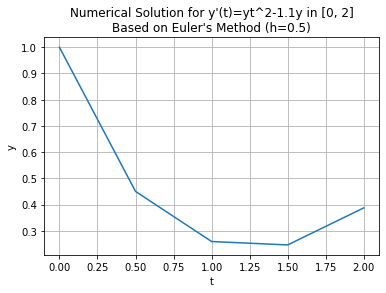

Using h=0.25...
t = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
y = [1, 0.725, 0.5369531249999999, 0.4228505859374999, 0.3660300384521483, 0.35687928749084463, 0.3981434551069735, 0.5126096984502284, 0.7641088317523717]


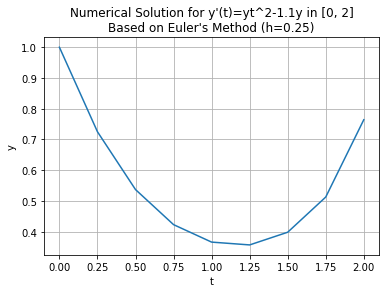

In [2]:
import matplotlib.pyplot as plt

def eulers_method(t0, y0, tmin, tmax, h):
    # Euler's method implementation
    # Input is initial condition (t0,y0), interval to compute [t_min,t_max] and step/distance h 
    # Output is 2 vectors containing t and y values (ready to be plotted)
    tn = [t0]
    yn = [y0]
    i = 0
    while tn[i] < tmax:
        i += 1
        # Compute next x
        tn.append(tn[i - 1] + h)
        # Compute y value and append to list
        yn.append(yn[i-1] + f(tn[i-1],yn[i-1])*h)
    return tn, yn

def f(t, y):
    # Assuming y'(t)=f(t,y)
    # This example uses y'(t)=yt^2-1.1y
    # Input is t,y
    # Returns value f(t,y)
    return y*pow(t,2)-1.1*y

t_0 = 0
y_0 = 1
t_min = 0
t_max = 2

h = 0.5
xplot, yplot = eulers_method(t_0, y_0, t_min, t_max, h)
print('Using h=%.2lf...' % h)
print('t =', xplot)
print('y =', yplot)
plt.plot(xplot, yplot)
plt.title('Numerical Solution for y\'(t)=yt^2-1.1y in [0, 2]'
'\nBased on Euler\'s Method (h=0.5)')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

h = 0.25
xplot, yplot = eulers_method(t_0, y_0, t_min, t_max, h)
print('Using h=%.2lf...' % h)
print('t =', xplot)
print('y =', yplot)
plt.plot(xplot, yplot)
plt.title('Numerical Solution for y\'(t)=yt^2-1.1y in [0, 2]'
'\nBased on Euler\'s Method (h=0.25)')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

## Solution (using 4th order Runge Kutta)

Using h=0.50...
t = [0, 0.5, 1.0, 1.5, 2.0]
y = [1, 0.6015702372233073, 0.46452378509080733, 0.5913802795456276, 1.5844521043366453]


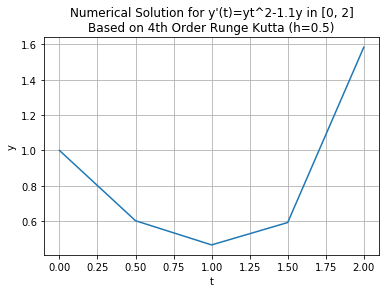

Using h=0.25...
t = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
y = [1, 0.7635469927330811, 0.6015059857908641, 0.504411559924858, 0.46456386116602383, 0.48483381741743015, 0.5915536181871107, 0.8705442901209199, 1.5937023367434842]


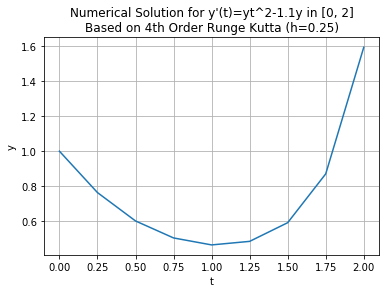

In [3]:
import matplotlib.pyplot as plt

def runge_kutta_4(t0, y0, tmin, tmax, h):
    # 4th order Runge Kutta implementation
    # Input is initial condition (t0,y0), interval to compute [t_min,t_max] and step/distance h 
    # Output is 2 vectors containing t and y values (ready to be plotted)
    tn = [t0]
    yn = [y0]
    i = 0
    while tn[i] < tmax:
        # Calculate k values
        k1 = h * f(tn[i], yn[i])
        k2 = h * f(tn[i] + (h / 2), yn[i] + (k1 / 2))
        k3 = h * f(tn[i] + (h / 2), yn[i] + (k2 / 2))
        k4 = h * f(tn[i] + h, yn[i] + k3)
        # Compute y value and append to list
        yn.append(yn[i] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4))
        i += 1
        # Compute next x
        tn.append(tn[i - 1] + h)
    return tn, yn

def f(t, y):
    # Assuming y'(t)=f(t,y)
    # This example uses y'(t)=yt^2-1.1y
    # Input is t,y
    # Returns value f(t,y)
    return y*pow(t,2)-1.1*y

t_0 = 0
y_0 = 1
t_min = 0
t_max = 2

h = 0.5
xplot, yplot = runge_kutta_4(t_0, y_0, t_min, t_max, h)
print('Using h=%.2lf...' % h)
print('t =', xplot)
print('y =', yplot)
plt.plot(xplot, yplot)
plt.title('Numerical Solution for y\'(t)=yt^2-1.1y in [0, 2]'
'\nBased on 4th Order Runge Kutta (h=0.5)')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

h = 0.25
xplot, yplot = runge_kutta_4(t_0, y_0, t_min, t_max, h)
print('Using h=%.2lf...' % h)
print('t =', xplot)
print('y =', yplot)
plt.plot(xplot, yplot)
plt.title('Numerical Solution for y\'(t)=yt^2-1.1y in [0, 2]'
'\nBased on 4th Order Runge Kutta (h=0.25)')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()


## Conclusions

For Euler's Method, we can observe the fact that the global trunctuation error is at the order of $O(h)$, and thus by decreasing the step size from $h=0.5$ to $h=0.25$ reduces the error, resulting in a more accurate representation of the numerical solution in the corresponding figure. However, we can also note the massive improvement offered by the 4th order Runge Kutta method, which has a global trunctuation error of $O(h^{4}$ and is therefore outperforming Euler's method, even with the larger step size of $h=0.5$. For this case, we can again observe that decreasing the step size reduces the error and improves the plot of the numerical solution   